In [105]:
import numpy as np
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field/src/lib')
from lib.lib_tmd_model import setParams
from lib.lib_solvers import solve_self_consistent_k_space
from lib.lib_init_cond import *
from lib.lib_plot import showBandStructure, showGrandpotentialMinimization,\
showMagProf, showWF

# Set the desired parameters

tmd : choose the TMD (MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2)

Nk : Number of ks

Ny : Number of atoms along the transverse direction

nHole : Density of holes (to study a hole-doped system)

invTemp : Inverse temperature (if we set it very high, we get T = 0)

betaStart : Inverse temperature at which the annealing starts

betaSpeed : This parameter (> 1) regulates the speed of the annealing

betaThreshold: The point at which annealing stops (and after which we jump to the desired temperature - maybe zero!)

U : On-site interaction

itMax : Maximum allowed number of iterations

dyn : 'kick' (random small deviation), 'local' (local update), 'mixed' (both), 'wait' (both, waiting for a while)

singleExcitationFreq : How often to shake up the Markovian dynamics

osc : Oscillations in the annealing scheme

dampFreq : Frequency of the damping

delta : Tolerance for updated densities convergence

nUp, nDown = ferro(...) : Initial condition

In [143]:
# Number of orbitals in the model
nOrb = 3

# Dimensions of the ribbon
Ny = 16

# Number of k-points used
Nk = 512

# Model parameters
t = 1
U = 20

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = True
osc = False

# Inverse temperature and annealing parameters
invTemp = 'infty'
betaStart = 0.1
betaSpeed = 1.25
betaThreshold = 20

# Solver parameters
itMax = 50
dampFreq = 1
delta = 1e-5
singleExcitationFreq = itMax
dyn = 'wait'

# Initial conditions
seed = 1766790370
nUp, nDown = random(2 / 3, nOrb * Ny, seed)

# Show initial condition

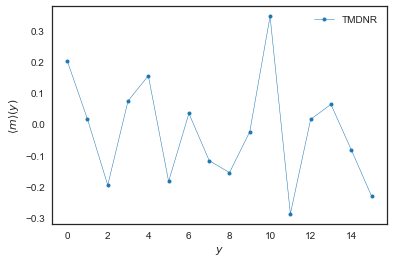

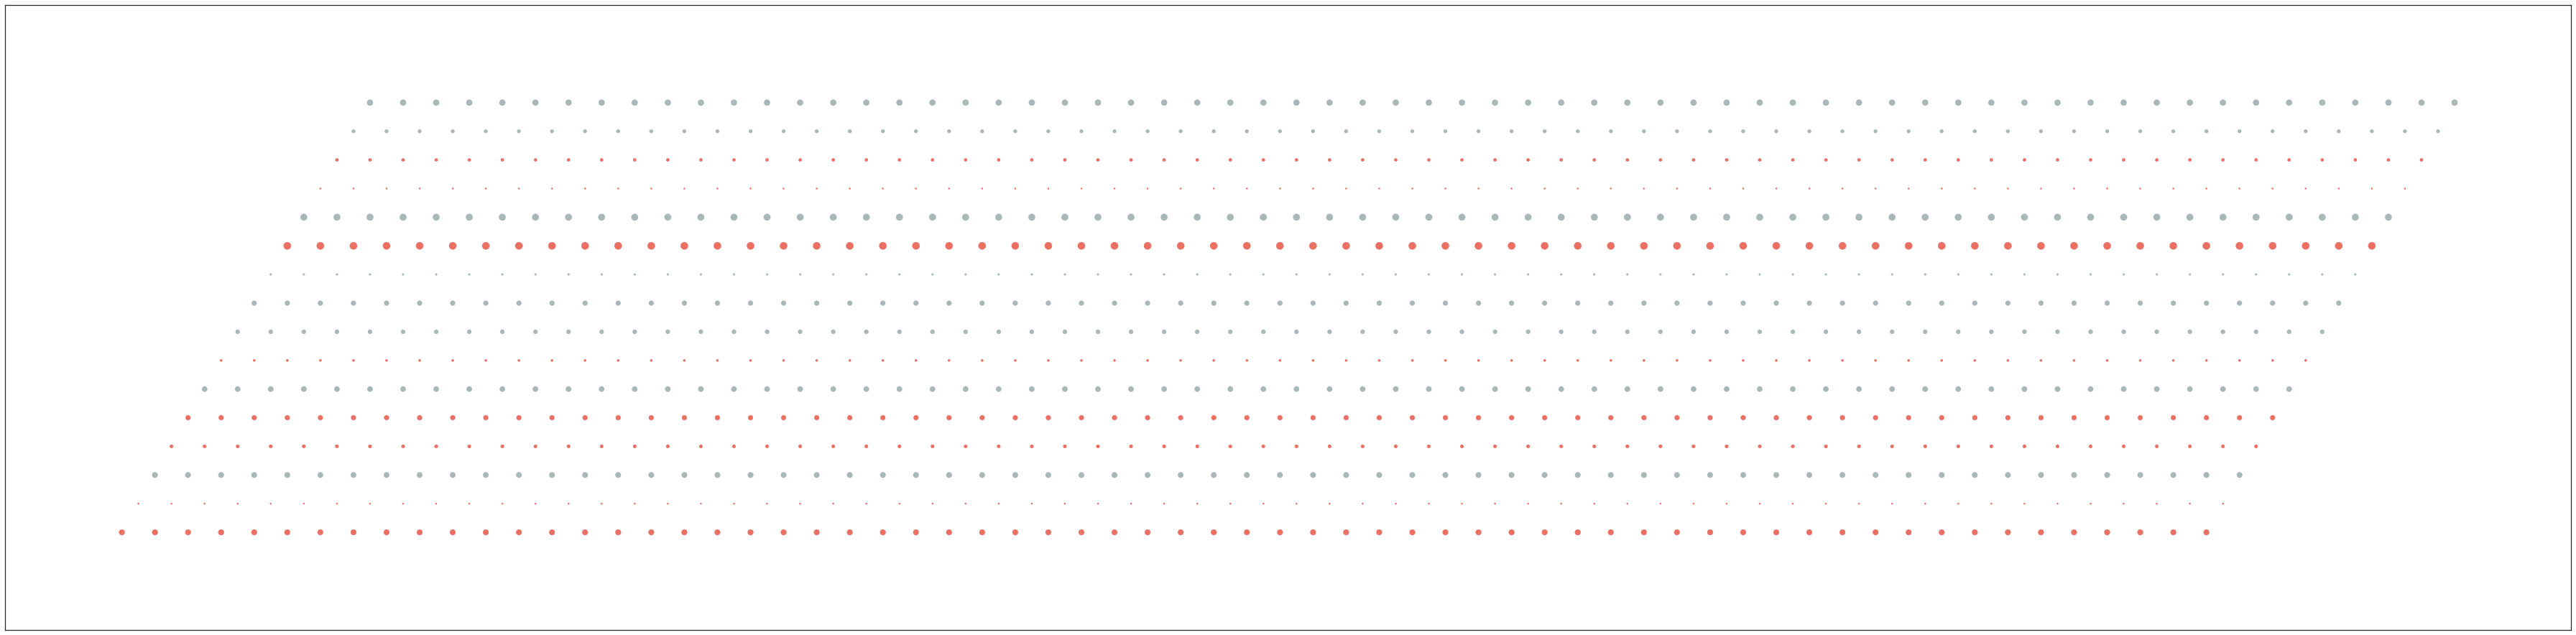

In [144]:
dotscale = 100
longLength = 64
showMagProf(nUp, nDown, Ny, nOrb, dotscale, longLength)

# Iterative mean field solution

In [145]:
%%time
nUp, nDown, energies,\
lastGrandpotential, itSwitch, lastIt, mu, abs_t0,\
eUp, eDown, wfUp, wfDown\
= solve_self_consistent_k_space(abs_t0, e1, e2, t0, t1, t2, t11, t12, t22,\
                                  Nk, Ny, nOrb, nHole,\
                                  invTemp, betaStart, betaSpeed, betaThreshold,\
                                  anneal_or_not, U, itMax, dampFreq, dyn,\
                                  singleExcitationFreq, osc, delta, nUp, nDown)

Started annealing.

Inverse temperature:  0.09999999999999998
iteration:  0
deltaUp:  0.0948190399065
deltaDown:  0.081585865626
Inverse temperature:  0.35
Inverse temperature:  0.6625
Inverse temperature:  1.053125
Inverse temperature:  1.54140625
Inverse temperature:  2.1517578125
Inverse temperature:  2.914697265625
Inverse temperature:  3.86837158203125
Inverse temperature:  5.060464477539062
Inverse temperature:  6.550580596923828
Inverse temperature:  8.413225746154785
iteration:  10
deltaUp:  0.000122826544884
deltaDown:  9.39695183734e-05
Inverse temperature:  10.741532182693481
Inverse temperature:  13.651915228366851
Inverse temperature:  17.289894035458566
Inverse temperature:  21.837367544323207

Finished annealing.

CPU times: user 21.7 s, sys: 362 ms, total: 22.1 s
Wall time: 24.2 s


# Band structure

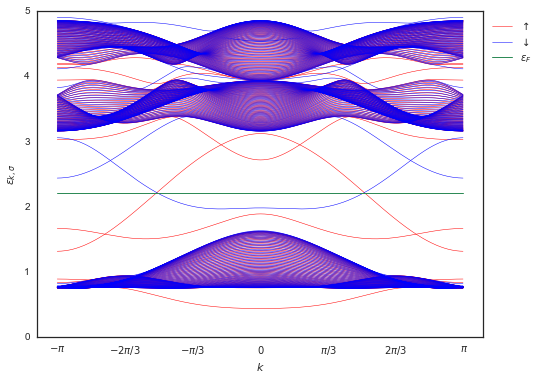

In [142]:
showBandStructure(Nk, abs_t0, eUp, eDown, mu)

# Show solution

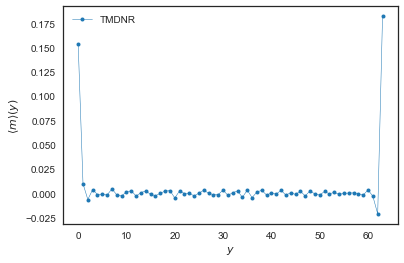

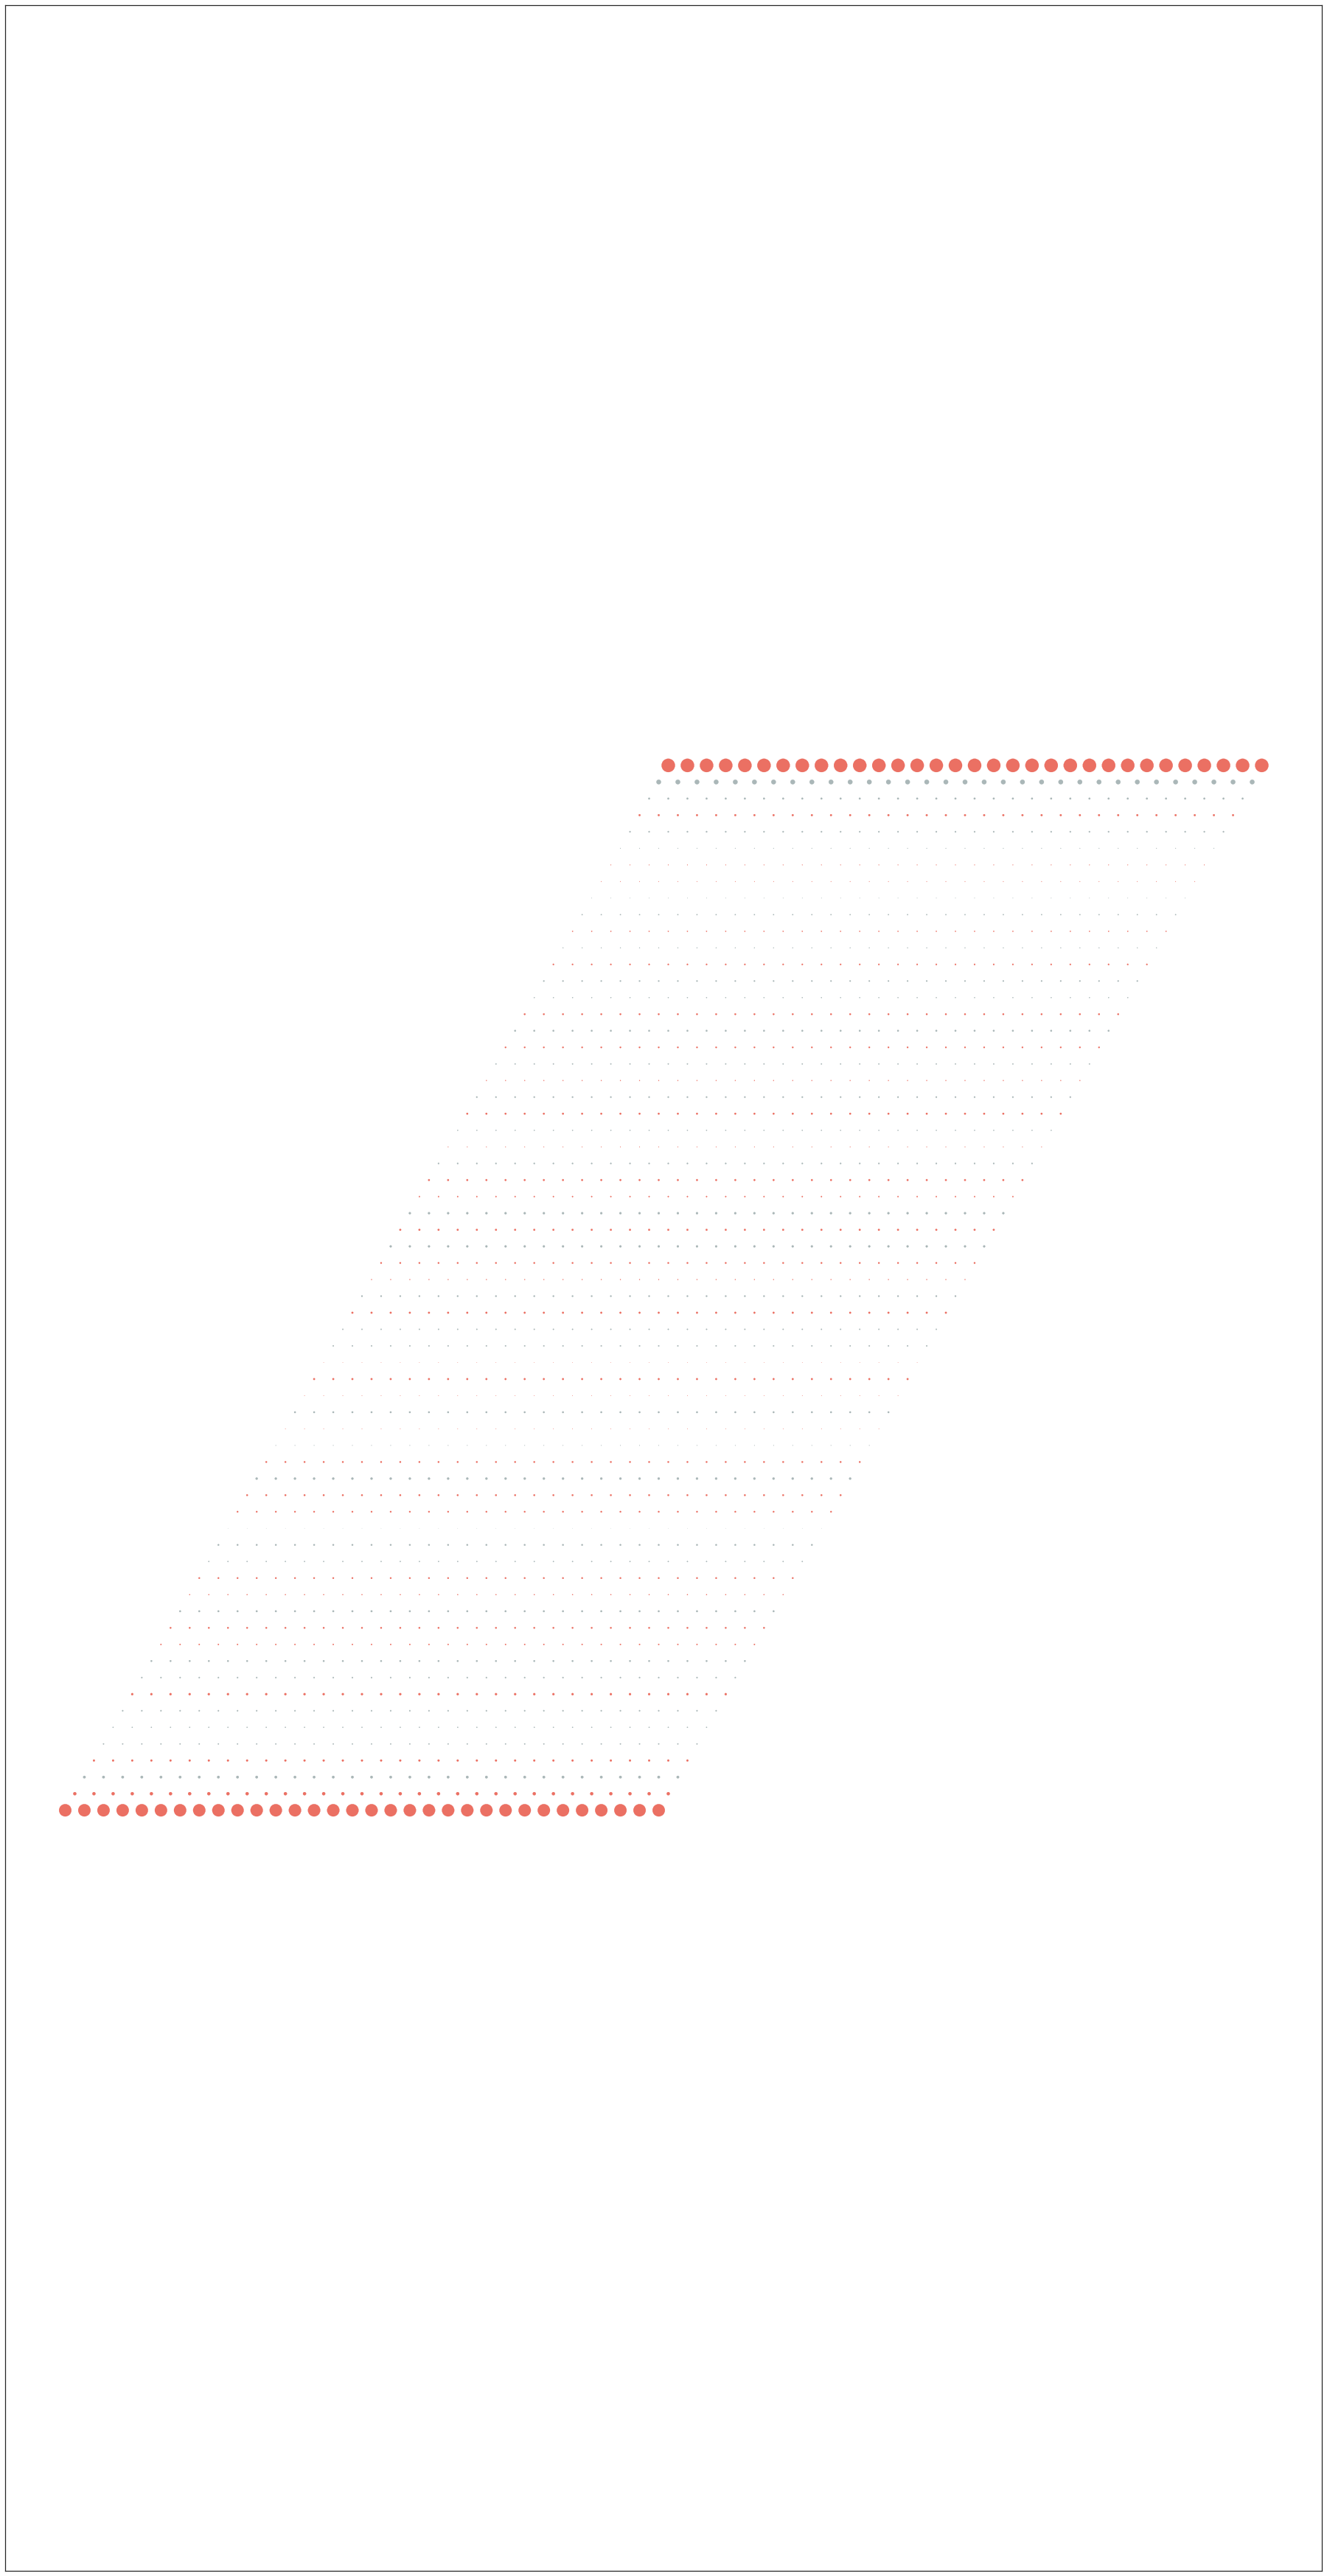

In [137]:
dotscale = 600
longLength = 32
showMagProf(nUp, nDown, Ny, nOrb, dotscale, longLength)

# Grandpotential minimization

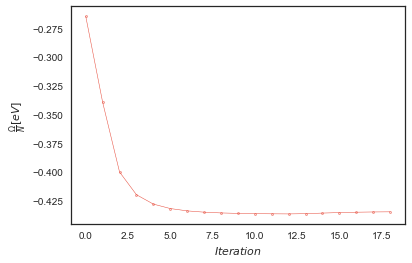

In [140]:
showGrandpotentialMinimization(lastIt, energies)

In [141]:
lastGrandpotential

-0.43555970726871468

# Edge-states

In [131]:
Kpoint = 1.5
Ktol = 0.2
Eedge = 2.3
Etol = 0.2
showWF(wfUp, wfDown, Nk, Ny, nOrb, Kpoint, Ktol, Eedge, Etol, eUp, eDown, abs_t0)

IndexError: index 0 is out of bounds for axis 0 with size 0